The lorenz model is:

dx/dt = o (y - x)

dy/dt = rx - y - xz

dz/dt = xy - bz

where o, r and b are positive constants.

x measures the rate of convective overturning, and y and z measure the horizontal and vertical temperature gradients.

The parameters o and b depend on the fluid properties and the geometry of the container. Commonly the values o = 10 and b = 8/3 are used.

The parameter r is proportional to the applied temperature gradient.

A program, called 'lorenz', which solved the Lorenz model using adaptive Runge-Kutta method is outlined here:

1. Set initial state [x,y,z] and parameters [r,o,b]
2. Loop over the desired number of steps
    - Record values of x, y, z, t, and r for plotting
    - Find new state using rka, the adaptive Runge-Kutta function
3. Print maximum and minimum time step returned by rka
4. Graph the time series x(t)
5. Graph the (x,y,z) phase space trajectory

The function 'lorzrk' specifies the three equations for the lorenz model for use in the Runge-Kutta routines. It can be seen below:

- Inputs: x(t), t (not used), [r,o,b]
- Output: dx(t)/dt
- Compute dx(t)/dt = [dx/dt dy/dt dz/dt]

Exercise 20:

Try running the lorenz program with the following values for the parameter r:

(a) 0, (b) 1, (c) 14, (d) 20, (e) 100. Use the initial condition [x y z] = [1 1 20].

Describe the different types of behavior found and compare with Figure 3.13.


[ 1  1 20]
[ 0.98997689  0.79429663 19.48252744]
[ 0.9618307   0.59940688 18.97656961]
[ 0.91845205  0.41802612 18.48193155]
[ 0.86267441  0.25206674 17.99853288]
[ 0.79720931  0.10274677 17.52636251]
[ 0.7245963  -0.02931738 17.06543999]
[ 0.6471666  -0.14401791 16.61578484]
[ 0.56701888 -0.24166563 16.17739447]
[ 0.48600573 -0.32290523 15.75022987]
[ 0.40572912 -0.38863772 15.33420832]
[ 0.32754326 -0.43995085 14.92920159]
[ 0.25256346 -0.47805823 14.53503834]
[ 0.18167944 -0.50424709 14.15150936]
[ 0.11557201 -0.5198345  13.77837449]
[ 0.0547319  -0.52613147 13.41537019]
[-5.20157574e-04 -5.24414347e-01  1.30622171e+01]
[-0.05001281 -0.51590277 12.71862721]
[-0.09370364 -0.50174331 12.38430955]
[-0.1316594  -0.48299809 12.05897566]
[-0.16403714 -0.46063772 11.74234329]
[-0.19106677 -0.43553762 11.43413928]
[-0.21303496 -0.40847732 11.13410144]
[-0.23027073 -0.38014204 10.84197962]
[-0.24313255 -0.35112607 10.55753606]
[-0.25199711 -0.32193745 10.28054527]
[-0.25724967 -0.29300367 10

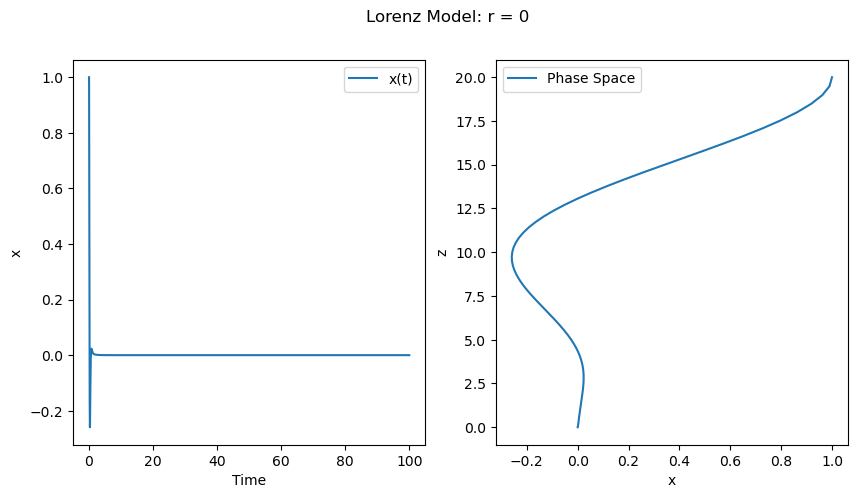

[ 1  1 20]
[ 0.99045736  0.80418281 19.48257779]
[ 0.96366711  0.61871997 18.97676737]
[ 0.92237803  0.44601178 18.48235884]
[ 0.86927052  0.28774424 17.99924798]
[ 0.80689921  0.14497399 17.52739546]
[ 0.7376493   0.01821572 17.06679207]
[ 0.66370524 -0.09247148 16.61743128]
[ 0.58703059 -0.18740129 16.1792892 ]
[ 0.50935728 -0.26718296 15.75231162]
[ 0.43218306 -0.33265111 15.336407  ]
[ 0.35677536 -0.38480318 14.93144446]
[ 0.28418044 -0.42474503 14.5372554 ]
[ 0.21523641 -0.45364451 14.15363766]
[ 0.15058912 -0.47269277 13.78036124]
[ 0.09070974 -0.48307278 13.41717468]
[ 0.03591347 -0.48593432 13.06381151]
[-0.01362149 -0.48237489 12.7199963 ]
[-0.05783525 -0.47342567 12.38544999]
[-0.0967681  -0.46004195 12.05989439]
[-0.13054352 -0.44309716 11.74305576]
[-0.15935224 -0.42338006 11.43466749]
[-0.18343781 -0.40159438 11.13447193]
[-0.20308349 -0.37836046 10.84222161]
[-0.21860073 -0.35421841 10.55767978]
[-0.23031902 -0.32963234 10.28062049]
[-0.23857718 -0.30499552 10.01082837]
[

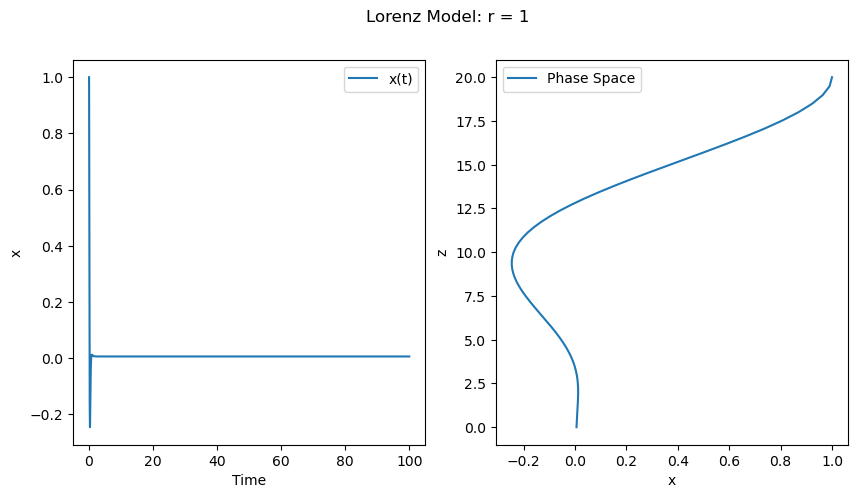

[ 1  1 20]
[ 0.99671104  0.93299727 19.48323533]
[ 0.98765167  0.87205713 18.9793828 ]
[ 0.97394881  0.81717564 18.48812628]
[ 0.95661592  0.76823369 18.00917259]
[ 0.93655432  0.72502607 17.54224534]
[ 0.91455689  0.68728618 17.08708023]
[ 0.89131355  0.65470677 16.64342156]
[ 0.86741808  0.62695697 16.21101969]
[ 0.84337567  0.60369604 15.7896294 ]
[ 0.81961102  0.58458432 15.37900885]
[ 0.79647646  0.56929152 14.97891899]
[ 0.77426009  0.55750302 14.58912332]
[ 0.75319357  0.5489243  14.20938793]
[ 0.73345963  0.54328393 13.83948164]
[ 0.71519894  0.54033537 13.47917624]
[ 0.69851657  0.53985779 13.12824679]
[ 0.68348784  0.54165618 12.78647191]
[ 0.67016356  0.54556092 12.4536341 ]
[ 0.65857477  0.55142695 12.12951999]
[ 0.6487369   0.55913264 11.81392058]
[ 0.6406534   0.5685785  11.50663148]
[ 0.63431897  0.57968586 11.20745308]
[ 0.62972224  0.59239543 10.91619072]
[ 0.62684819  0.60666594 10.6326548 ]
[ 0.62568011  0.62247288 10.35666097]
[ 0.62620133  0.63980724 10.08803014]
[

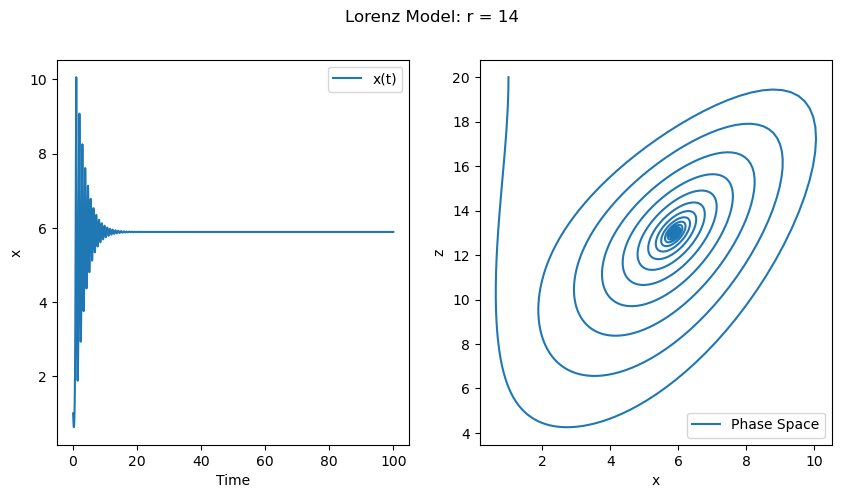

[ 1  1 20]
[ 0.99960211  0.99263439 19.48354064]
[ 0.99879127  0.99040734 18.9806181 ]
[ 0.99808643  0.99312653 18.49092446]
[ 0.99793933  1.00061107 18.01416274]
[ 0.99874235  1.0126991  17.55004622]
[ 1.00083633  1.02925342 17.09829823]
[ 1.00451793  1.05016562 16.65865206]
[ 1.01004683  1.07535893 16.23085122]
[ 1.01765225  1.10479015 15.81464974]
[ 1.0275392   1.13845085 15.40981267]
[ 1.03989407  1.17636808 15.01611671]
[ 1.05488983  1.21860467 14.63335092]
[ 1.0726907   1.26525941 14.26131761]
[ 1.09345641  1.31646705 13.89983328]
[ 1.11734605  1.37239834 13.5487298 ]
[ 1.14452159  1.43326009 13.20785566]
[ 1.17515099  1.49929536 12.87707751]
[ 1.20941112  1.57078373 12.55628183]
[ 1.24749044  1.64804177 12.24537691]
[ 1.28959138  1.73142368 11.94429512]
[ 1.33593268  1.82132201 11.65299552]
[ 1.38675151  1.91816858 11.37146684]
[ 1.4423055   2.02243549 11.09973096]
[ 1.5028747   2.1346362  10.83784689]
[ 1.56876338  2.25532666 10.58591531]
[ 1.64030189  2.38510631 10.34408385]
[

KeyboardInterrupt: 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def lorzrk(state, t, r, o, b): #lorenz equations
    x, y, z = state
    dxdt = o * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return np.array([dxdt, dydt, dzdt])

def runge_kutta_fourth_order(f_0, dt, t_max, r,o,b):
    t_values = np.arange(0, t_max, dt)
    f_values = [f_0]

    for i in range(1, len(t_values)):
        t_i = t_values[i-1]
        f_i = f_values[i - 1]
        #print(f_i)
        k1 = lorzrk(f_i, t_i, r,o,b)
        k2 = lorzrk(f_i + 0.5 * k1 * dt, t_i + 0.5 * dt,r,o,b)
        k3 = lorzrk(f_i + 0.5 * k2 * dt, t_i + 0.5 * dt,r,o,b)
        k4 = lorzrk(f_i + k3 * dt, t_i + dt,r,o,b)

        f_new = f_i + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4) * dt
        f_values.append(f_new)

    return t_values, f_values

def lorenz_program(r_values, initial_state, t_max, dt, o, b):
    for r in r_values:
        t_values, f_values = runge_kutta_fourth_order(initial_state, dt, t_max, r, o, b)

        x_values = [f[0] for f in f_values]
        y_values = [f[1] for f in f_values]
        z_values = [f[2] for f in f_values]

        print(f_values)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(t_values, x_values, label='x(t)')
        plt.xlabel('Time')
        plt.ylabel('x')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(x_values, z_values, label='Phase Space')
        plt.xlabel('x')
        plt.ylabel('z')
        plt.legend()
        
        plt.suptitle(f"Lorenz Model: r = {r}")
        plt.show()

# parameters
r_values = [0, 1, 14, 20, 28, 100]
initial_state = np.array([1, 1, 20])
t_max = 100
dt = 0.01
o = 10
b = 8/3

lorenz_program(r_values, initial_state, t_max, dt, o, b)
